Data Science Project 1 involves the assessment of a data set from King's County, Washington, containing house sales data. The objective of this study is to develop a predictive model to support house pricing, using the techniques of multivariate linear regression.

My plan is to:
   1. Inspect the data
      a. review statistics (missing data,duplicates,extraneous values)
   2. Clean data and review content
   3. Check the data distribution
          i. plot histograms with KDE
          ii. view predictors vs. target with scatter plots
   4. Run a regression to establish a model
   5. Adjust the model to improve the predictive result by adding other independent variables and/or transforming
         the existing variables to improve upon their heteroscedascity and skew.

In [ ]:
Executive Summary - Exercise Conclusions:

A linear regression model was developed using sqft_living to predict the sales price, however as a predictor of sales 
price, sqft_living performs inadequately. The variable histogram showed skew and after running the model, R squared is
0.492, which means 49% of variance in house price(target variable) can be explained using the living square footage. 
The residuals were conical in the plots,indicating heteroscedasticity, which breaks the assumption of normality in the
data. This is confirmed by residuals in the QQ plot where the points follow a strongly nonlinear pattern, suggesting 
that the data are not distributed as a standard normal(X ~ N(0,1)).

A second multivariate model was developed using log-transformed values for sqft_living and adding bedrooms and a log 
transformation of bathrooms. This model retured an R squared value of 0.361, which was performing less predictively 
than the prior model.  


I was disappointed to not be further along in the exploration and analytics of this data. I feel I understand how to
improve upon my result, but did not have the time (or skill yet) to execute as I planned. However, I gained some
important learnings:
    
1. Creating a plan first: This was a good step that I took, allowing me to remain on task to the needed steps
    
2. Rethink time allocation:  Time allocated (time management) between data cleaning and model refinement was not well
    balanced. 
3. Build competency in dataframe manipulation: A majority of time and failure in the project was due to my inability
    to create the right code to transform data as desired. This was true in early data exploration (I attempted to use
    and transform the view, and location columns (zipcode, lat, and long). After unproductive hours, I moved on.)
4. Study problems solidify learning: This exercise was helpful to integrate learning about each of the course lessons,
    particularly python, list comprehension, linear regression and multivariate regression.
    

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Load Data and Retrieve High-Level Information on the Data 

In [320]:
df = pd.read_csv('Course_Materials/project1/dsc-v2-mod1-final-project-nyc-ds-career-042219/kc_house_data.csv')

In [321]:
df.head()  # display the first 5 rows of the file and all columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [322]:
df.info() # 1. evaluate the name of each column, to identify the potential dependent variable and to understand which 
          #    potential independent variables we have to work with
          # 2. look for consistency in the number of entries for each column, to identify missing data
          # 3. evaluate the data types, to find columns that may require type adjustment
          # 4. evaluate the name of each column, for potential insight on continuous vs. categorial data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [288]:
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,...,21597.000000,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,...,7.657915,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,...,1.173200,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


A. Observations and Plans:
1. Price is an obvious variable to be leveraged for this exercise as the dependent variable. (domain knowledge)  

2. While most columns contain 21597 values, the following have missing data that must be dealt with:
           a. waterfront       19221
           b. view             21534
           c. yr_renovated     17755         

3. Irregularity can be observed in the exposed data. Data cleaning and exploration will be pursued for:
           a. The column date is a non-null object, and may be more valuable as a datetime object.
           b. sqft_basement is a non-null object, containing mixed data that needs cleaning. 12826 values are 0. 
              Could mean there is no basement, or this is a placeholder.   
           c. bedrooms has at least one outlier (33), detectable from the maximum value and the quantile statistics.               Should delete row.

4. The dataframe contains continuous and categorial data.  

   Potentially Continuous:  date, price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated,   
   lat, long, sqft_living15, sqft-lot15
   
   Potentially Categorical: id, bedrooms(values 1:33), bathrooms(values 0.5:8), floors(values 1:3.5), 
   waterfront(values 0:1), view(values 0:4), condition (values 1:5), grade(values 3:13), zipcode

In [323]:
# A.2. Deal with missing data. Quantify the number of missing values in each column
df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [290]:
# A.2. Understand further the values in these columns, to facilitate decisions on imputing values.

for col in ['waterfront','view', 'yr_renovated']:
    print('Values for {}:\n{}\n\n'.format(col, df[col].unique()))

Values for waterfront:
[nan  0.  1.]


Values for view:
[ 0. nan  3.  4.  2.  1.]


Values for yr_renovated:
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]




In [324]:
# A.2. Understand further the values in these columns, to facilitate decisions on imputing values.

for col in ['waterfront','view']:
    print('Counts for {}:\n{}\n\n'.format(col, df[col].value_counts()))

Counts for waterfront:
0.0    19075
1.0      146
Name: waterfront, dtype: int64


Counts for view:
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64




A.2. Decisions made for imputing values:

1. Greater than 10% of the waterfront data are missing and less than 1% of the existing data are differentiated. This column will be removed. 

2. Only 63 values of view data are missing. This small percentage is unlikely to inform the analysis significantly. These rows will be removed.

3. Greater than 15% of the yr_renovated data are missing. This column will be removed.

In [325]:
# A.2.a. drop the waterfront column
df = df.drop('waterfront', axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [326]:
# A.2.b.  remove the 63 rows with NAN values in the view column
df = df[df['view'].notnull()]
df.view.isna().sum()

0

In [327]:
# A.2.c.  drop the yr_renovated column
df = df.drop('yr_renovated', axis =1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [328]:
#3. Data cleaning and exploration
#A.3.a.for date  

df['date'] =  pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(11), object(1)
memory usage: 3.3+ MB


In [330]:
#A.3.b.
df.sqft_basement.value_counts().head()

0.0      12798
?          452
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

In [331]:
#A.3.b.
# make a new dataframe containing only rows with ?
df_basement = df[['id', 'sqft_living', 'sqft_above', 'sqft_basement']]
has_Q =  df_basement['sqft_basement']=='?'
df_basement = df_basement[has_Q]
df_basement.head()

,id,sqft_living,sqft_above,sqft_basement
6,1321400060,1715,1715,?
18,16000397,1200,1200,?
42,7203220400,3595,3595,?
79,1531000030,3450,3450,?
112,2525310310,1540,1160,?


In [332]:
 #A.3.b.
df_basement['diff'] = (df_basement['sqft_living'] - df_basement['sqft_above'])
df_basement['diff'].describe()

count     452.000000
mean      287.088496
std       451.542281
min         0.000000
25%         0.000000
50%         0.000000
75%       565.000000
max      2620.000000
Name: diff, dtype: float64

In [333]:
#A.3.b. and Duplicate Checks
# Check for duplicates in original file before merging back
duplicates = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
print(len(duplicates))
duplicates.head()

353


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0.0,3,6,840,0.0,1925,98055,47.4840,-122.211,1480,6969
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0.0,3,6,840,0.0,1925,98055,47.4840,-122.211,1480,6969
11422,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0.0,4,7,1480,0.0,1980,98023,47.2977,-122.367,1830,6956


Observations:

The 353 duplicates appear to be re-sales of homes. As they represent different transactions in different years, these values will be retained as much as practical. 

In [334]:
#A.3.b.
# Check if merge file would be affected by duplicates
dup_Q = duplicates['sqft_basement']=="?"
dup_Q.value_counts()

False    349
True       4
Name: sqft_basement, dtype: int64

In [335]:
#A.3.b.
# When merging the df_basement values, it is expedient to address the 4 duplicates in this transaction by electing to keep the first.
full = pd.merge(df, df_basement.drop_duplicates(subset=['id'], keep='first'), how= 'left')
full.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,diff
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,NaN
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,NaN
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,NaN
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,NaN
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,NaN


In [336]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21533
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
diff             452 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(11), object(1)
memory usage: 3.5+ MB


In [337]:
#A.3.b.
# replace the ? in the sqft_basement column with the calculated result for sqft_basement from our diff column 
full.loc[full['sqft_basement'] == '?','sqft_basement'] = full.loc[full['sqft_basement'] == '?','diff'].astype(float)


In [338]:
full.sqft_basement.value_counts().head()

0.0      12798
0.0        282
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

In [339]:
#A.3.b.
# remove the diff column, now it has served its purpose of providing the calculated values for sqft_basement.
# establish the new cleaned dataframe from this file
full = full.drop('diff', axis =1)
df_clean = full
df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [340]:
#check for extraneous values
for col in df_clean.columns:
    print(col, '\n', df[col].value_counts().head(), '\n\n')

id 
 795000620     3
5430300171    2
5083000375    2
3395040550    2
5101405604    2
Name: id, dtype: int64 


date 
 2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    124
Name: date, dtype: int64 


price 
 450000.0    171
350000.0    171
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 


bedrooms 
 3    9791
4    6865
2    2754
5    1596
6     270
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    134
1440    133
1010    129
1800    129
Name: sqft_living, dtype: int64 


sqft_lot 
 5000    357
6000    290
4000    251
7200    220
4800    119
Name: sqft_lot, dtype: int64 


floors 
 1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
Name: floors, dtype: int64 


view 
 0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 


condition 
 3    13981
4    

In [341]:
#check for extraneous values
for col in df_clean.columns:
    print(col, '\n', df[col].value_counts().tail(), '\n\n')

id 
 3021059276    1
880000205     1
8165500110    1
9492500170    1
1777500160    1
Name: id, dtype: int64 


date 
 2015-01-10    1
2015-05-27    1
2015-01-31    1
2014-11-30    1
2015-05-24    1
Name: date, dtype: int64 


price 
 870515.0    1
336950.0    1
386100.0    1
176250.0    1
884744.0    1
Name: price, dtype: int64 


bedrooms 
 8     13
9      6
10     3
11     1
33     1
Name: bedrooms, dtype: int64 


bathrooms 
 6.25    2
6.75    2
6.50    2
7.50    1
7.75    1
Name: bathrooms, dtype: int64 


sqft_living 
 4970    1
2905    1
2793    1
4810    1
1975    1
Name: sqft_living, dtype: int64 


sqft_lot 
 35752    1
937      1
9133     1
64438    1
14321    1
Name: sqft_lot, dtype: int64 


floors 
 2.0    8211
1.5    1903
3.0     611
2.5     159
3.5       7
Name: floors, dtype: int64 


view 
 0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 


condition 
 3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtyp

In [342]:
#A.3.c. Drop the outlier in the bedrooms column
to_drop = df_clean.loc[df_clean['bedrooms']== 33]
df_clean.drop(to_drop.index, axis = 0, inplace = True)

In [343]:
df_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,4.582452e+09,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.233874,3.409650,7.657456,1788.592300,1971.003390,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,2.876808e+09,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.765702,0.650579,1.172661,827.749142,29.376271,53.507609,0.138529,0.140736,685.122310,27256.060980
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904950e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [344]:
df_clean.sqft_basement = df_clean.sqft_basement.astype(float)

In [346]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21533
Data columns (total 19 columns):
id               21533 non-null int64
date             21533 non-null datetime64[ns]
price            21533 non-null float64
bedrooms         21533 non-null int64
bathrooms        21533 non-null float64
sqft_living      21533 non-null int64
sqft_lot         21533 non-null int64
floors           21533 non-null float64
view             21533 non-null float64
condition        21533 non-null int64
grade            21533 non-null int64
sqft_above       21533 non-null int64
sqft_basement    21533 non-null float64
yr_built         21533 non-null int64
zipcode          21533 non-null int64
lat              21533 non-null float64
long             21533 non-null float64
sqft_living15    21533 non-null int64
sqft_lot15       21533 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11)
memory usage: 3.3 MB


Section 2: Analysis




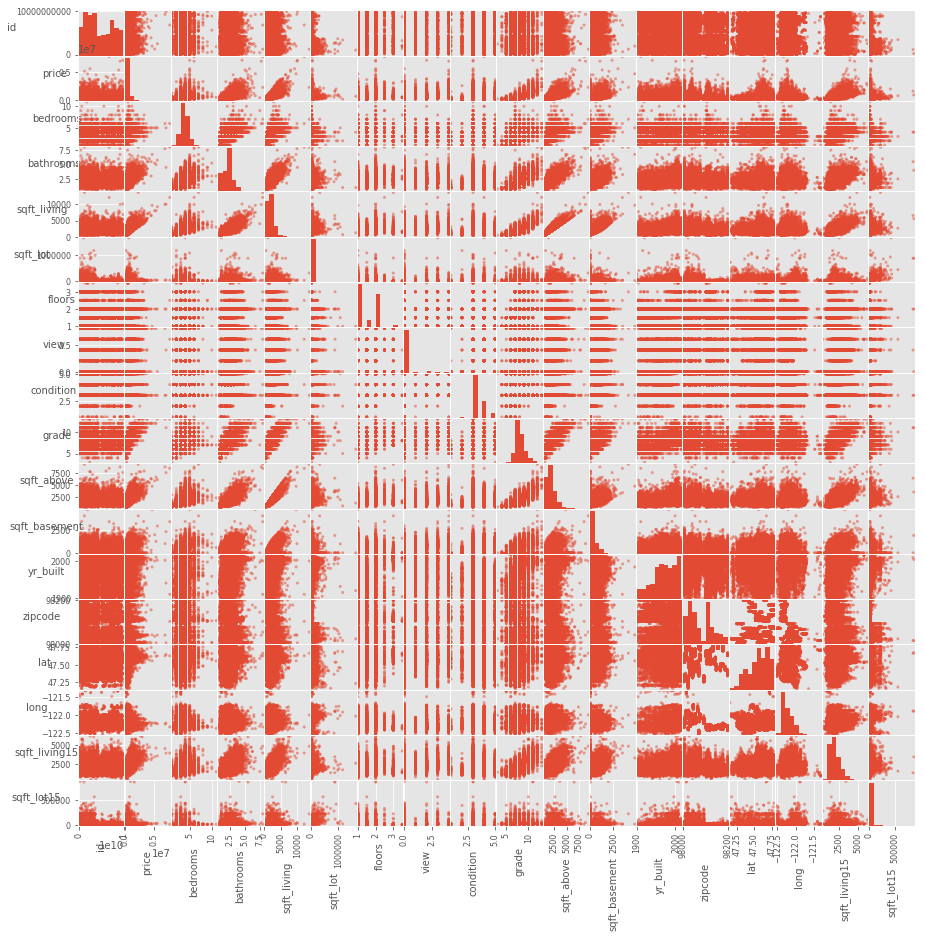

In [347]:
# Scatter plot of all relevant variables

scatter_matrix = pd.plotting.scatter_matrix(df_clean, figsize  = [15, 15])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
scatter_matrix;  

In [ ]:
B. Observations and Plans:
    
1. The plots help identify association between pairwise variables. Plots with diagonal shapes represent strong correlation.
   Variables to explore correlation with price would be bathrooms, sqft_living, grade, sqft_above, sqft_basement and sqft_living15.
   These data show heteroscedascity, as so others, and with further exploration may be relevant.

2. The plots provide support for the categorization of Continuous and Categorical variables: 
    Categorical variables plot in distinct columns or rows: floors, view, condition, and grade.
    These data should be binned and explored for opportunity    

3.  Continuous variables plot against themselves in normal-like shapes as histograms: shapes  date, price, sqft_living, sqft_lot, 
    sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft-lot15
   
Plan: Baseline correlation with price to identify top possible predictors among variables 

In [348]:
# Create a baseline correlation analysis with price
df_clean.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701599
grade            0.668320
sqft_above       0.605719
sqft_living15    0.585329
bathrooms        0.525063
view             0.395739
sqft_basement    0.321812
bedrooms         0.315236
lat              0.307863
floors           0.257069
sqft_lot         0.090341
sqft_lot15       0.083194
yr_built         0.054284
condition        0.035367
long             0.022428
id              -0.017383
zipcode         -0.053626
Name: price, dtype: float64

In [ ]:
Observations:
The top variables that are candidates for predictors are sqft_living, grade, sqft_above, sqft_living15, and bathrooms.
However,three of these variables are related to square feet, and there may be multicollinearity, which would limit the
utility of using all in a prediction model.

For now, understand the correlation between these variables for subsequent multilinear regression approaches. At this
time, continue the project exploring the best single variable. 

In [399]:
#identify the most significant correlations between the variables. 0.75 is considered significant.
abs(df_clean.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False


Observations:
The sqft_living, sqft_living15, and sqft_above variables have high correlation scores. sqft_living also has high correlation with bathrooms and grade. These variables will be reviewed for selection between them and/or decision to retain them in the model.     

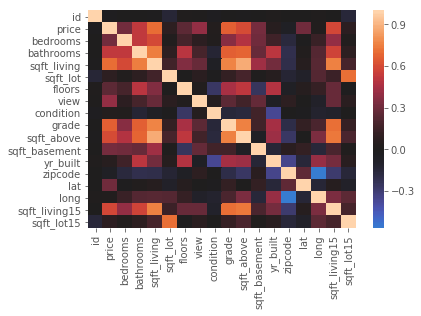

In [400]:
# Facilitate correlation assessment with a heat map view.
import seaborn as sns
sns.heatmap(df_clean.corr(), center=0);

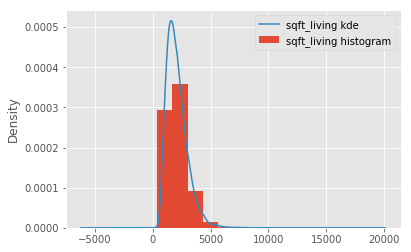

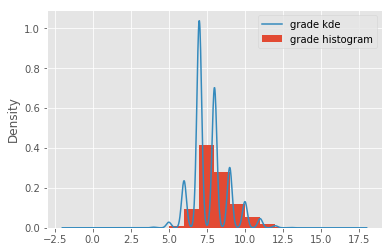

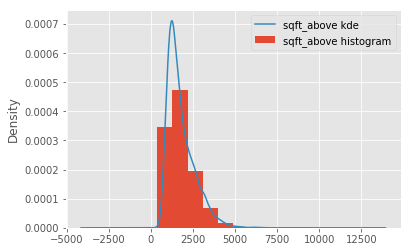

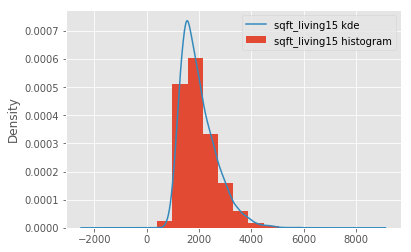

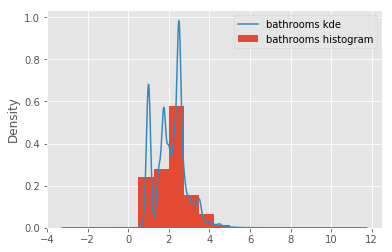

In [396]:
#for all variables of interest, check distribution of predictors

data = df_clean[['sqft_living','grade','sqft_above', 'sqft_living15', 'bathrooms']]

for column in data:
    data[column].plot.hist(normed=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Observations:
    
1. No variable is normal, but the data tend to follow an overall normal pattern. There is skew in the sqft variables. There is limited kurtosis in most of these graphs, which suggest the distribution has light tails or lack of outliers. 

2. The KDE are irregular for bathrooms and grade, which reflect that these data have categorical answers.

3. From this data, it seems that none of the variables are excellent candidates as predictors, but further 
   exploration will be pursued.

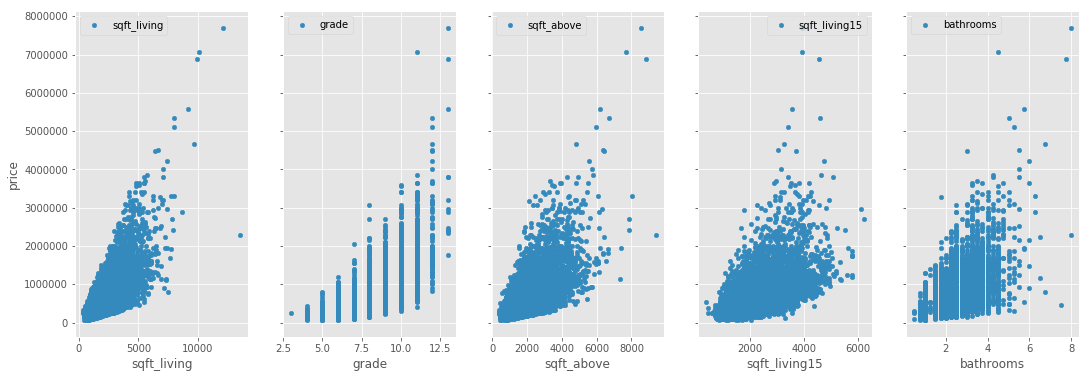

In [497]:
# visualize the relationship between the predictors and the target using scatterplots

data = df_clean[['sqft_living','grade','sqft_above', 'sqft_living15', 'bathrooms','price']]

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for row, column in enumerate(['sqft_living','grade','sqft_above', 'sqft_living15', 'bathrooms']):
    data.plot(kind='scatter', x=column, y='price', ax=axs[row], label=column)
plt.legend()
plt.show()

In [ ]:
Observations:
    
In all graphs, we see some heteroscedascity, but correlation seems positive. Graph 2 shows a linear pattern between
predictor and target, and restructuring this data into bins to be treated as a categorical variable is worth exploring.

For time constraint, I will pursue simple regression analyses.

In [498]:
# build the formula for the first variable: sqft_living
f = 'price~sqft_living'

# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()

In [499]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:32:25   Log-Likelihood:            -2.9911e+05
No. Observations:               21533   AIC:                         5.982e+05
Df Residuals:                   21531   BIC:                         5.982e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.218e+04   4404.621     -9.575      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9379      1.938    144.475      0.000     276.140     283.736
==============================================================================
Omnibus:                    14581.827   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516123.571
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations:

R-squared value is 0.492, which means 49% of variance in house price(target variable) can be explained using the living square footage. This is not a strong R-squared

The intercept: a unit increase in square feet of living space is associated with a 279.93 "unit" increase in price. In other words, an addition of 1000 feet to the home is associated with a higher sales price by $279,938. 

In the warning, a review of stats boards suggest this is due to scaling of the explanatory variables, i.e. an eigenvalue is large because the variable is large, and some variables, like constant, are small. (statsmodels reports the condition number of the design matrix and not of a standardized design matrix.) If I scaled down the number of data points in my independent variable (sqft_living), this would be corrected.


   sqft_living
0          370
1        13540
0    6.140140e+04
1    3.748184e+06
dtype: float64


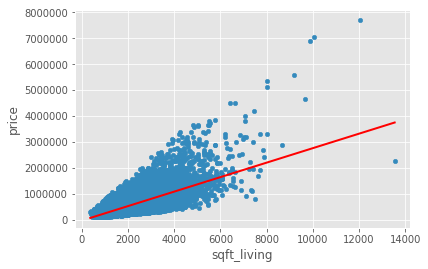

In [500]:
# create a DataFrame with the minimum and maximum values of sqft_living

X_new = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

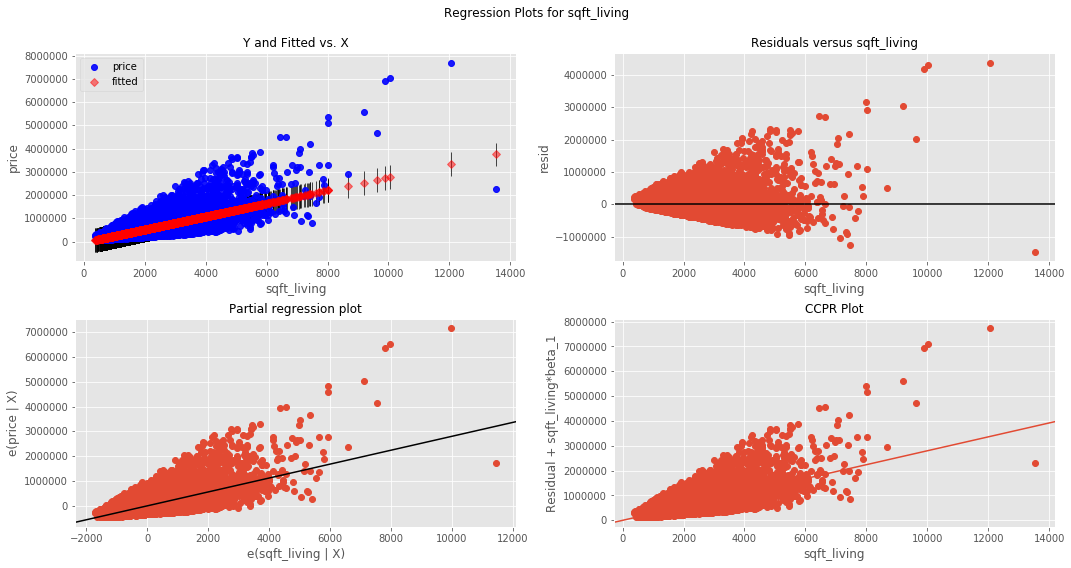

In [393]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [ ]:
Observations:

From the first and second plot in the first row, we see that the variance is creating a cone-shape which is a 
sign of heteroscedasticity. i.e. the residuals are heteroscedastic. This breaks the assumption of homoscedastic data
for a good predictive model.

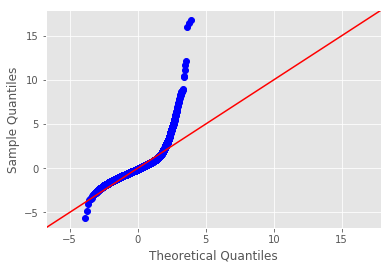

In [397]:
#Check the normality assumptions using a QQPlot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
Observations and Conclusions:

QQ plot confirms that the normality assumption of the residuals is not fulfilled. The points follow a strongly 
nonlinear pattern, suggesting that the data are not distributed as a standard normal (X ~ N(0,1)). 

As a predictor of sales price, sqft_living performs inadequately. The variable histogram showed skew and after 
running the model, R-squared is 0.492, which means 49% of variance in house price(target variable) can be 
explained using the living square footage. The residuals were conical in the plots, indicating heteroscedasticity,
which breaks the assumption of normality in the data. This is confirmed by residuals in the QQ plot.

As this was the best fitted of the variables, none of the others are likely to be successful. Thus, I will do further 
processing of the data, to improve upon the model.


In [ ]:
Iteration 2:
Review prior data and select additional variables.
    Retain sqft_living
    Explore bedrooms per bathrooms
    Explore date (note: not accomplished)
    Explore zip code (note: not accomplished)

This requires the creation of a new variable of bedrooms per bedrooms, and review of the data for date and zip code.    

In [501]:
df_cleanA = df_clean[['id', 'sqft_living', 'bathrooms', 'bedrooms', 'date', 'zipcode', 'price']]
df_cleanA.head()

,id,sqft_living,bathrooms,bedrooms,date,zipcode,price
0,7129300520,1180,1.00,3,2014-10-13,98178,221900.0
1,6414100192,2570,2.25,3,2014-12-09,98125,538000.0
2,5631500400,770,1.00,2,2015-02-25,98028,180000.0
3,2487200875,1960,3.00,4,2014-12-09,98136,604000.0
4,1954400510,1680,2.00,3,2015-02-18,98074,510000.0


In [502]:
# Create new variable column bathrooms per bedrooms (in the cleaned data)

df_cleanA['bed_per_bath'] = df_cleanA['bedrooms'] / df_clean['bathrooms']
df_cleanA.describe()

,id,sqft_living,bathrooms,bedrooms,zipcode,price,bed_per_bath
count,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000
mean,4.582452e+09,2079.849208,2.115729,3.371662,98077.938188,5.400530e+05,1.751024
std,2.876808e+09,917.462472,0.768616,0.904162,53.507609,3.660674e+05,0.653307
min,1.000102e+06,370.000000,0.500000,1.000000,98001.000000,7.800000e+04,0.400000
25%,2.123050e+09,1430.000000,1.750000,3.000000,98033.000000,3.220000e+05,1.333333
50%,3.904950e+09,1910.000000,2.250000,3.000000,98065.000000,4.500000e+05,1.600000
75%,7.312200e+09,2550.000000,2.500000,4.000000,98118.000000,6.450000e+05,2.000000
max,9.900000e+09,13540.000000,8.000000,11.000000,98199.000000,7.700000e+06,8.000000


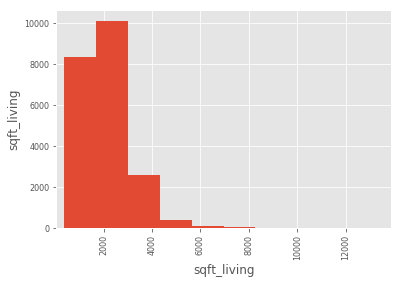

In [504]:
# Try transforming the variable sqft_living with a logarithmic function

non_normal = ['sqft_living']
for feat in non_normal:
    df_cleanA[feat] = df_cleanA[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_clean[non_normal], figsize=(6,4));

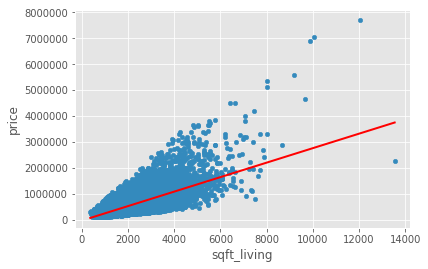

In [493]:
# plot the observed data and the least squares line
df.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

In [ ]:
df_cleanA = df_clean[['id', 'sqft_living', 'bathrooms', 'bedrooms', 'date', 'zipcode', 'price']]

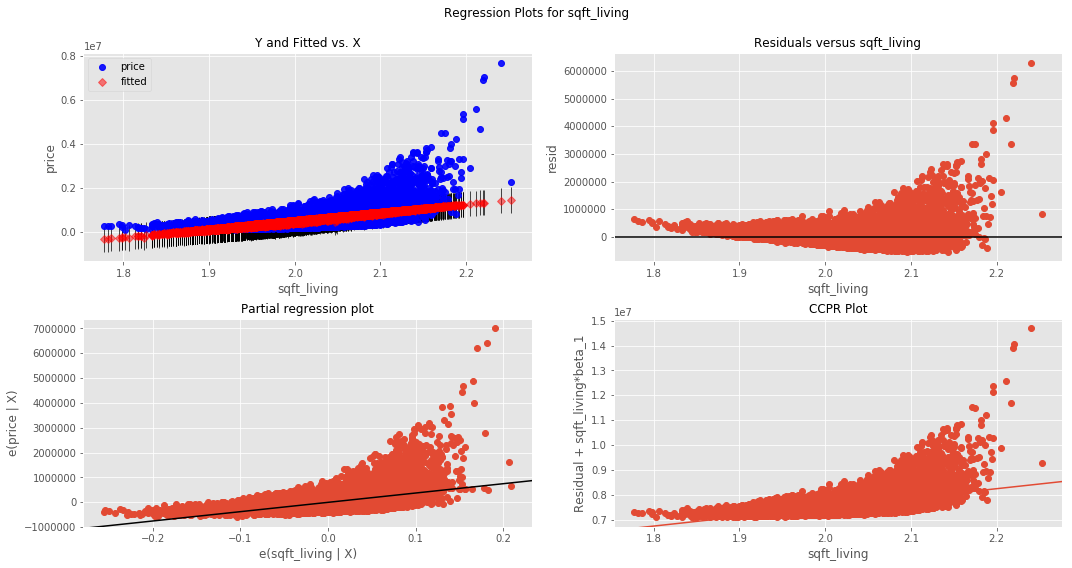

In [494]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()  

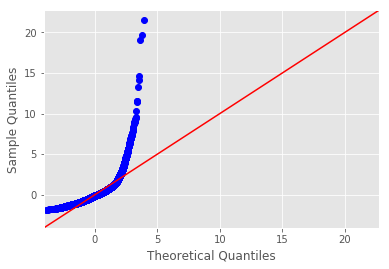

In [495]:
#Check the normality assumptions using a QQPlot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [492]:
# Evaluate a model after transforming the sqft_living and bathroom features
outcome = 'price'
x_cols = ['sqft_living', 'bed_per_bath']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df_cleanA).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     6082.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:45:17   Log-Likelihood:            -3.0158e+05
No. Observations:               21533   AIC:                         6.032e+05
Df Residuals:                   21530   BIC:                         6.032e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.981e+06    7.8e+04    -89.508      0.000   -7.13e+06   -6.83e+06
sqft_living   3.752e+06   3.76e+04     99.902      0.000    3.68e+06    3.83e+06
bed_per_bath -3.289e+04   3244.179    -10.140      0.000   -3.93e+04   -2.65e+04
==============================================================================
Omnibus:                    19438.802   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680636.367
Skew:                           4.012   Prob(JB):                         0.00
Kurtosis:                      45.530   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Observations:
The correlations appeared to improve by transforming the non-normally distributed features (sqft_living) using log 
transformation. With that change, and leveraging a new value of bedrooms per bathroom, the R2 value of the model 
got worse over the single variable model (from 0.492 to 0.361.) This is also a poor predictive value.

The P value is small, but the kurtosis value of 45.53 is poor, and should be driven to a value less than 6. Next 
steps should include addressing kurtosis by exploring eliminating outliers.
                                                                                                             
The skew at 4 remains unsatisfactory, and should be driven toward 1.

In [ ]:
Exercise Conclusions:

I was disappointed to not be further along in the exploration and analytics of this data. I feel I understand how to
improve upon my result, but did not have the time (or skill yet) to execute as I planned. However, I gained some
important learnings:
    
1. Rethink time allocation:  Time allocated (time management) between data cleaning and model refinement was not well
    balanced. 
2. Build competency in dataframe manipulation: A majority of time and failure in the project was due to my inability
    to create the right code to transform data as desired. This was true in early data exploration (I attempted to use
    and transform the view, and location columns (zipcode, lat, and long). After unproductive hours, I moved on.)
3. Study problems solidify learning: This exercise was helpful to integrate learning about each of the course lessons,
    particularly python, list comprehension, linear regression and multivariate regression.
    